In [382]:
#importing required libraries
from numpy import sin, cos, deg2rad, matrix, size, invert, multiply, log, linspace, array, exp, inf
from matplotlib.pyplot import plot, loglog, subplot
from sympy import init_printing
from mpl_toolkits.mplot3d import Axes3D
import csv
import pandas as pd

In [383]:
def N_xyz(Nx_,Ny_,Nz_): #Span of the material under study
    return [Nx_,Ny_,Nz_]
ial = 4.02e-10 #interatomic length
N = N_xyz(100,6,6)

In [384]:
X=(N[0]-1) * ial
Y=(N[1]-1) * ial
Z=(N[2]-1) * ial

x_coor_0 =[]
for i in range(N[0]):
    x_coor_0.append((-X/2)+(i*ial))
y_coor_0 =[]
for i in range(N[1]):
    y_coor_0.append((-Y/2)+(i*ial))
z_coor_0 =[]
for i in range(N[2]):
    z_coor_0.append((-Z/2)+(i*ial))

coor_0 = [x_coor_0,y_coor_0,z_coor_0]

In [448]:
vel = 1e1 #velocity per step
acc = 10 #acceleration
ts = .0005e-9 #timestep ex: 0.005 nano seconds as 0.005e-9
N_steps = 10

In [449]:
#verlet algorithm
def verlet_pos(pos,t,ts,acc):
    pos_t_plus_dt = pos + vel*ts + ( 0.5 * acc * ts**2 )
#    pos_t_minus_dt = pos - vel*ts + ( 0.5 * acc * ts**2 )
#    pos_t_dt = 2*pos - pos*(t-ts) + acc * ts**2
# the above given post_t_dt is found by adding above given two taylor equations
    return pos_t_plus_dt
#----------------------------------------------------------------
x_coor=[x_coor_0]
t=0
#def cgpos(pos,t, ts):
    
    
for i in range(N_steps):
    x_coor_temp = []
    for pos_ in x_coor[-1]:
        x_coor_temp.append(verlet_pos(pos_, t+(i*ts), i*ts, acc))
    x_coor.append(x_coor_temp)

In [450]:
def growth(x_coor_local):
    return_list = []
    p_temp=[]
    q_temp=[]
    for i in range(N_steps):
        x_coor_growth_temp=[]
        p=0
        q=0
        for j in range(N[0]):
            if x_coor_local[i][j]>=0:
                x_coor_growth_temp.append([x_coor_local[i+1][j]-x_coor_local[i][j],"p"])
                p+=1
            else:
                x_coor_growth_temp.append([x_coor_local[i][j]-x_coor_local[i+1][j],"q"])
                q+=1
        p_temp.append(p)
        q_temp.append(q)
        return_list.append(x_coor_growth_temp)
    
    return return_list,p_temp,q_temp
delx_, p , q = growth(x_coor)

In [451]:
# my_df = pd.DataFrame(x_coor)
# my_df.to_csv('x_coor.csv', index=False, header=False)
# my_df = pd.DataFrame(x_coor)
# my_df.to_csv('x_coor.csv', index=False, header=False)

In [452]:
def mean_delx(delx__,char):
    growth_temp=[]
    for i in range(N_steps):
        sum=0
        c_count=0
        for j in range(N[0]):
            #print(delx__[i][j][0])
            #print(char)
            if delx__[i][j][1]==char:
                c_count+=1
                #print("if")
                sum+=delx__[i][j][0]
        #print(c_count)
        
        growth_temp.append(sum/c_count)
    return growth_temp
delx_p_mean = mean_delx(delx_,'p')
delx_q_mean = mean_delx(delx_,'q')

In [453]:
def length_of_growth_at_steps_fn(delx_p_mean_temp,delx_q_mean_temp):
    length_of_growth_at_steps_temp = []
    for i in range(N_steps):
        delX_p_mean = sum(delx_p_mean_temp[0:i+1])
        delX_q_mean = sum(delx_q_mean_temp[0:i+1])
        delX_mean = delX_p_mean + delX_q_mean
        length_of_growth_at_steps_temp.append(delX_mean)
    return length_of_growth_at_steps_temp

total_length_of_growth_at_steps = length_of_growth_at_steps_fn(delx_p_mean,delx_q_mean)

In [454]:
strain_in_steps = multiply((1/X),total_length_of_growth_at_steps)
#total_length_of_growth_at_steps

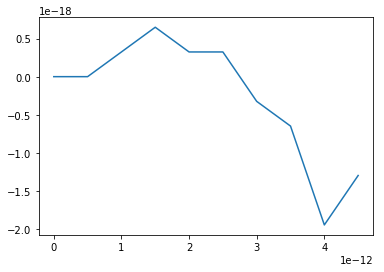

In [455]:
plot(multiply(ts,range(N_steps)),strain_in_steps)

In [456]:
r = linspace(1,4,100)
sigma=2.85e-10#0.25
epsilon=0.5* 1.6e-19#0.50722*96.5*1e3
avagadro = 6.023e-23
def lj(r_):
    return 4*epsilon*((sigma/r_)**12-(sigma/r_)**6)/avagadro
def forceLJ(r):
    f=sigma/r
    Fxij = 24*epsilon*f**6*(2*f**6 - 1)/r*(r)/r
    return Fxij/avagadro
#plot(r,lj(r))

In [457]:
stress_vec=multiply(1/ial**2,forceLJ(array(delx_p_mean)))
#stress_vec

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


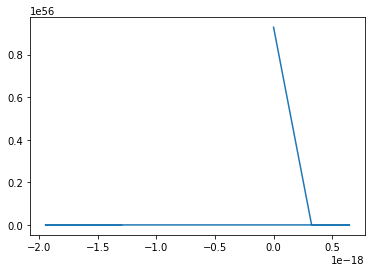

In [458]:
plot(strain_in_steps,stress_vec)

In [459]:
for i in range(size(stress_vec)):
    print(stress_vec[i], '\t', strain_in_steps[i], '\t',stress_vec[i]/strain_in_steps[i])

nan 	 0.0 	 nan
9.28099457371e+55 	 0.0 	 inf
1.13293390688e+52 	 3.24757451911e-19 	 3.48855399687e+70
5.82127616245e+49 	 6.49514903821e-19 	 8.96249820935e+67
1.38297587924e+48 	 3.24757451911e-19 	 4.25848851537e+66
7.60298902288e+46 	 3.24757451911e-19 	 2.3411284262e+65
7.106045245e+45 	 -3.24757451911e-19 	 -2.1881084493e+64
9.57897971722e+44 	 -6.49514903821e-19 	 -1.47478982559e+63
1.68819662651e+44 	 -1.94854471146e-18 	 -8.66388447019e+61
3.65122445224e+43 	 -1.29902980764e-18 	 -2.81073184831e+61


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [460]:
dsig=[]
deps=[]
for i in range(size(delx_p_mean)-1):
    dsig.append(stress_vec[i+1]-stress_vec[i])
    deps.append(strain_in_steps[i+1]-strain_in_steps[i])

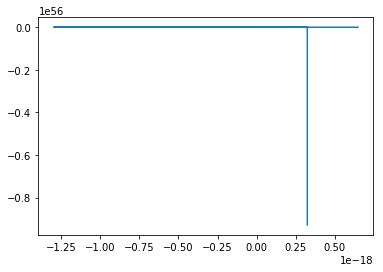

In [461]:
plot(deps,dsig)